# 分析IRAs

In [1]:
from my_weapon import *
sns.set_style('white')
import graph_tool.all as gt

In [4]:
user_data = pd.read_csv('data/ira_users_csv_hashed.csv')
user_data.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,94c383089f0dd9993020276bd01113ecb5935ad860bfa6...,94c383089f0dd9993020276bd01113ecb5935ad860bfa6...,94c383089f0dd9993020276bd01113ecb5935ad860bfa6...,USA,Conservative. Politics. Pro-Life. Writer. #Go...,NaN,1541,1676,2014-06-13,en
1,799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...,799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...,799bb58d3c064d3884fdc4604c74068ff059b60c0b3464...,Раша,На воре и шапка горит,NaN,299,324,2013-12-22,en
2,0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...,0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...,0d33d19fbadccaad0033a0a0d6ec7f9919e21da60ea958...,"Чеченская республика, Россия",Я никогда не хотел стать президентом. У меня в...,NaN,4094,0,2016-11-25,ru
3,efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...,efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...,efbe6ab452cf84134d5e7764cc1ce176067c8224fd8868...,US,❥ ❣ my sweethearts)),NaN,140,191,2013-08-11,en
4,d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...,d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...,d1e5ee3856d4af872b7bb31638fb86fa0a8ee3287d8ca8...,NaN,NaN,NaN,119,1152,2016-07-06,de


In [9]:
user_data.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [10]:
user_data.describe()

,follower_count,following_count
count,3836.000000,3836.000000
mean,1664.950209,826.092023
std,8860.043408,2726.252326
min,0.000000,0.000000
25%,58.000000,104.000000
50%,126.000000,239.000000
75%,461.250000,542.000000
max,257638.000000,74664.000000


In [11]:
# %matplotlib inline

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

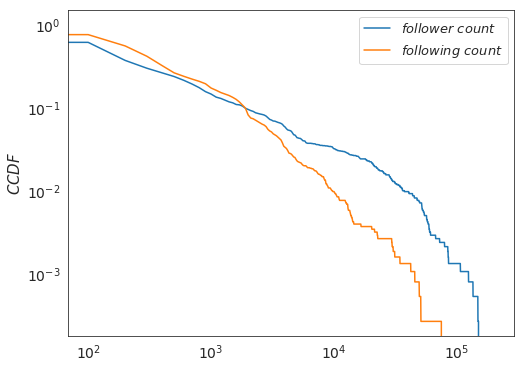

In [26]:
# user_data
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(user_data['follower_count'], 0, 200000, 100)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='$follower\ count$')

pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_follower_count.csv')


x, cdf, pdf = get_cdf_pdf(user_data['following_count'], 0, 100000, 100)
plt.ylabel('$CCDF$', fontsize=15)
pd.DataFrame({'x': x, 'cdf': cdf}).to_csv('dist_following_count.csv')


plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xscale('log'); plt.yscale('log')

plt.plot(x, cdf, label='$following\ count$')
plt.legend(fontsize=13)
plt.savefig('fig/fol.pdf', dpi=300)
plt.show()



In [23]:
user_data.iloc[user_data['follower_count'].idxmax(), :]

userid                                                             2527472164
user_display_name                                              Вестник Москвы
user_screen_name                                                   NovostiMsk
user_reported_location                                                 Москва
user_profile_description    Невозможно не любить этот город! Телефон редак...
user_profile_url                                      https://t.co/sIJZDK1hTI
follower_count                                                         257638
following_count                                                           544
account_creation_date                                     2014-05-04 00:00:00
account_language                                                           en
Name: 1014, dtype: object

In [24]:
user_data.iloc[user_data['following_count'].idxmax(), :]

userid                                                             4224729994
user_display_name                                                   Tennessee
user_screen_name                                                      TEN_GOP
user_reported_location                                                    NaN
user_profile_description    Unofficial Twitter of Tennessee Republicans. C...
user_profile_url                                                          NaN
follower_count                                                         147767
following_count                                                         74664
account_creation_date                                     2015-11-19 00:00:00
account_language                                                           en
Name: 2642, dtype: object

In [15]:
# user_data.groupby('account_creation_date').count()
user_data['account_creation_date'] = pd.to_datetime(user_data['account_creation_date'])
A = user_data.set_index('account_creation_date')
B = A.to_period('M').groupby('account_creation_date').count()
# creation_dates = pd.to_datetime(user_data["account_creation_date"])
# pd.date_range(2010)
# sum(B['userid'])

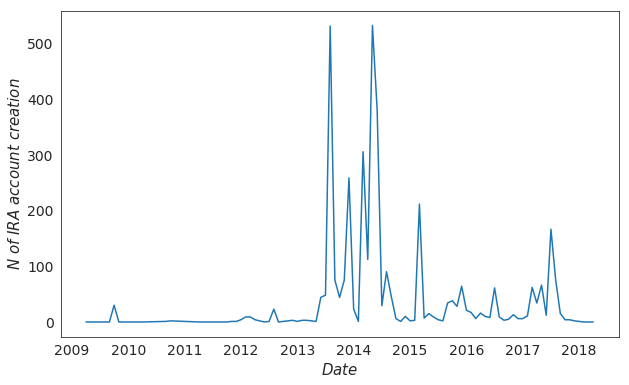

In [16]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['userid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ account\ creation$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/account_creation.pdf', dpi=300)
plt.show()

B.to_csv('account_creation.csv')

In [3]:
# load tweets

%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv')
tweets

<string>:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 59.7 s, sys: 3.42 s, total: 1min 3s
Wall time: 1min 7s


,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,877919995476496385,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,"Москва, Россия",Я примерный семьянин!,NaN,132,120,2013-12-07,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://ru-open.livejournal.com/374284.html],[2572896396],NaN
1,492388766930444288,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,Россия,Телефонист .Изучение истории Игра в любитель...,NaN,74,8,2014-03-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://pyypilg33.livejournal.com/11069.html],NaN,NaN
2,719455077589721089,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,Рязань,волны так и плещут фиолетовой волной,NaN,165,454,2014-04-29,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[https://www.youtube.com/watch?v=9GvpImWxTJc],[40807205],NaN
3,536179342423105537,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,Рязань,волны так и плещут фиолетовой волной,NaN,165,454,2014-04-29,...,NaN,NaN,0.0,0.0,0.0,0.0,[STOPNazi],NaN,NaN,NaN
4,841410788409630720,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,NaN,Отвечаю на любой #ВопросПрезиденту,http://t.co/3CVqbMQFbf,4430,4413,2012-02-25,...,NaN,NaN,0.0,0.0,3.0,4.0,[],[https://goo.gl/fBp94X],NaN,NaN
5,834365760776630272,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,NaN,Отвечаю на любой #ВопросПрезиденту,http://t.co/3CVqbMQFbf,4430,4413,2012-02-25,...,NaN,NaN,0.0,0.0,3.0,5.0,[],[https://goo.gl/9w5hso],NaN,NaN
6,577490527299457024,95b3aba6b9140f5dda993148de174ff57d62f4a6e68e88...,95b3aba6b9140f5dda993148de174ff57d62f4a6e68e88...,95b3aba6b9140f5dda993148de174ff57d62f4a6e68e88...,мой мир,my story - TV nerd,NaN,296,492,2013-12-20,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://nahnews.com.ua/180774-na-xarkovshhine-...,[2599775719],NaN
7,596522755379560448,5744c546bdf9e81ea0aad223c9db4b702ccba7c81d4c11...,5744c546bdf9e81ea0aad223c9db4b702ccba7c81d4c11...,5744c546bdf9e81ea0aad223c9db4b702ccba7c81d4c11...,Казань,пусть за меня говорят мои твитты,NaN,375,2067,2014-03-22,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://bit.ly/1Rizso9],[2518710111],NaN
8,567357519547207680,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,California,Troublemaker,NaN,696,863,2013-08-06,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9,665533117369876480,b88fd4fc4b169f0a98eb38d3f5ef72a1eb3f6861cb3e81...,b88fd4fc4b169f0a98eb38d3f5ef72a1eb3f6861cb3e81...,b88fd4fc4b169f0a98eb38d3f5ef72a1eb3f6861cb3e81...,Москва,NaN,NaN,218,450,2014-05-11,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://vesti.ru/t?2686779],[72525490],NaN


In [4]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [5]:
tweets.describe()

,tweetid,follower_count,following_count,in_reply_to_tweetid,quoted_tweet_tweetid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count
count,9.041308e+06,9.041308e+06,9.041308e+06,2.662080e+05,1.879130e+05,3.333184e+06,4779.000000,4779.000000,9.038635e+06,9.038635e+06,9.038635e+06,9.038635e+06
mean,6.403835e+17,8.670202e+03,2.522468e+03,6.111953e+17,7.965433e+17,6.711430e+17,53.958520,61.841277,1.981891e-01,2.810441e-01,4.002723e+00,3.457440e+00
std,1.550236e+17,2.214639e+04,5.028831e+03,1.334171e+17,8.698341e+16,1.232434e+17,12.332756,22.985006,1.307364e+01,7.408997e+00,2.903125e+02,1.403270e+02
min,1.747086e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.834783e+09,1.000000e+02,-43.323251,-115.148349,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.267902e+17,3.460000e+02,2.840000e+02,5.730938e+17,7.742985e+17,5.710871e+17,55.038939,37.660071,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.221623e+17,8.420000e+02,6.180000e+02,6.325940e+17,8.102428e+17,6.531061e+17,55.039231,73.275546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.800047e+17,4.486000e+03,2.014000e+03,6.568322e+17,8.500103e+17,7.946743e+17,56.367504,73.279744,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.009806e+18,2.576380e+05,7.466400e+04,1.001021e+18,9.989833e+17,1.001554e+18,61.879338,171.602940,1.163300e+04,3.249000e+03,3.258260e+05,1.236170e+05


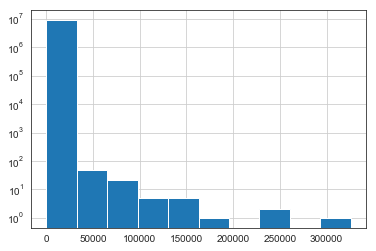

In [16]:
# plt.xscale("log")

plt.yscale("log")
tweets.like_count.hist()

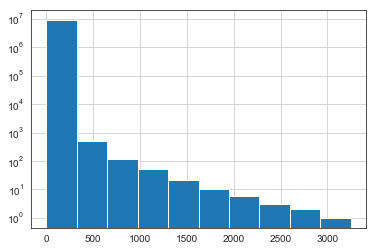

In [15]:
plt.yscale("log")
tweets.reply_count.hist()

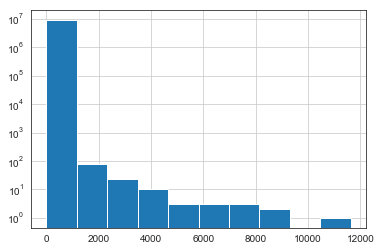

In [17]:
plt.yscale("log")
tweets.quote_count.hist()

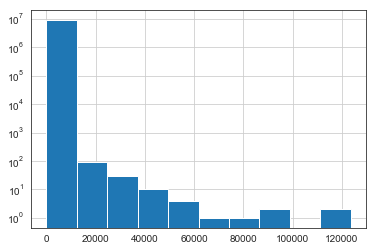

In [18]:
plt.yscale("log")
tweets.retweet_count.hist()

In [11]:
tweets['tweet_time'] = pd.to_datetime(tweets['tweet_time'])
election_tweets = tweets[tweets["tweet_time"] >= "2016-06-01"]

In [12]:
A = election_tweets.set_index('tweet_time')
A = tweets.set_index('tweet_time')
B = A.to_period('M').groupby('tweet_time').count()

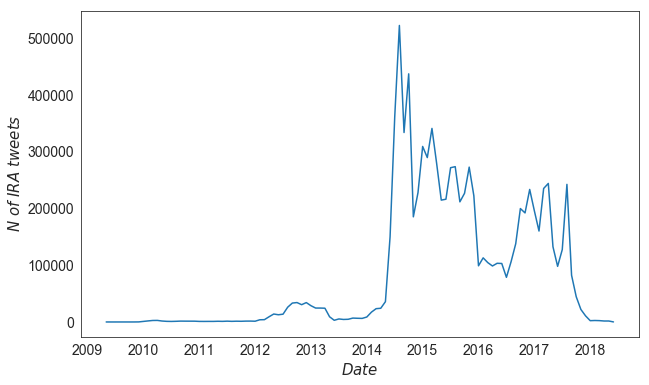

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot_date(B.index, B['userid'])
B['tweetid'].plot()
plt.xlabel('$Date$', fontsize=15); plt.ylabel('$N\ of\ IRA\ tweets$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/tweet_creation.pdf', dpi=300)
plt.show()

B['tweetid'].to_csv('tweet_creation.csv')

从整体上看2016年的选举，IRA的表现并不是很活跃；

In [31]:
from urllib.parse import urlparse
import requests

for i, row in tweets.iterrows():
    if not isinstance(row['urls'], str):
        tweets.drop(i)
    elif row['urls'][1: -1] == '':
        tweets.drop(i)
    else:
        url = row['urls'][1: -1]
        res = requests.head(url)
        hostname = urlparse(res.headers.get('location')).hostname
        if hostname:
            print(i, url, '>', hostname)
        else:
            tweets.drop(i)
        break
        
#     print(row)
#     if isinstance(urls, str):
#         url = urls[1: -1]
#         if url:
# #             hostname = urllib.parse.urlparse(url).hostname
#             res = requests.head(url)
#             hostname = urlparse(res.headers.get('location')).hostname
#             if hostname:
#                 print(hostname, type(hostname))



0 http://ru-open.livejournal.com/374284.html > ru-open.livejournal.com


In [47]:
# build retweet networks

userid_map = json.load(open("data/userid_mapping.json"))
G = nx.DiGraph()
G.add_nodes_from(userid_map.values())
# G.number_of_nodes()

for i, row in tweets.iterrows():
    if row["is_retweet"]:
        if row['retweet_userid'] in userid_map:
            ret_userid = userid_map[row['retweet_userid']]
            userid = userid_map[row['userid']]
            if ret_userid != userid:
                G.add_edge(ret_userid, userid)

# save the network
nx.readwrite.adjlist.write_adjlist(G, 'retweet_net_in_IRA.dat')

In [21]:
G = nx.readwrite.adjlist.read_adjlist('retweet_net_in_IRA.dat')

In [48]:
G.number_of_nodes()

3836

In [49]:
G.number_of_edges()

168074

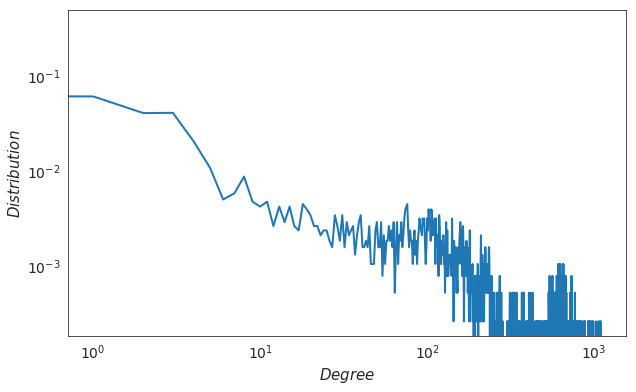

0 76
1 236
14 633
21 656
22 676
104 682
372 700
836 702
857 838
986 944
1020 1027
2168 1084
2274 1088
3585 1092


KeyError: 3585

In [66]:
plt.figure(figsize=(10, 6))

degree = nx.degree_histogram(G)
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree]  
plt.loglog(x, y, linewidth=2)
plt.xlabel('$Degree$', fontsize=15); plt.ylabel('$Distribution$', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig('fig/degree_distribution.pdf', dpi=300)
plt.show()

d = dict(G.degree())
n, de = 0, 0
for k, v in d.items():
    if v > de:
        print(k, v)
        n, de = k, v
        
userid_map = json.load(open("data/userid_mapping.json"))
userid_map[n]

33162


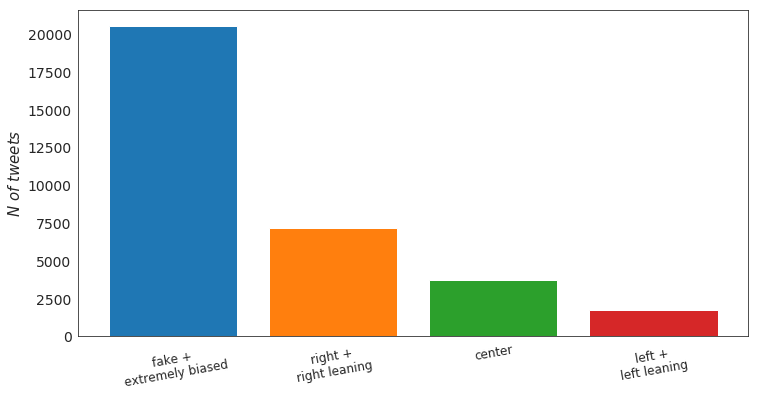

In [59]:
plt.figure(figsize=(12, 6))
x = [11638 + 8910, 42 + 7102, 3707, 1042 + 721]
print(sum(x))
label = ['fake +\n extremely biased', 'right +\nright leaning', 'center', 'left +\nleft leaning']
plt.bar(1, x[0])
plt.bar(2, x[1])
plt.bar(3, x[2])
plt.bar(4, x[3])
plt.xticks([1, 2, 3, 4], label, rotation=10)
plt.ylabel('$N\ of\ tweets$', fontsize=15)
plt.xticks(fontsize=12); plt.yticks(fontsize=14)
plt.savefig('fig/fake_news_bar.pdf', dpi=300)
plt.show()


发现了一些匿名的用户的真实id，但是非常的少；

位置：data/IRAs_be_found.json，仅仅命中了21857

3836个用户中匿名有3669个；

## 如何判断一个人是不是IRAs？

所以我要创造一个UID of IRAs 


In [5]:
uids_of_IRA = set(json.load(open("data/IRA_match.json")).values())

In [6]:
# 看看IRAs在我fake news的数据中有哪些？

IRA_tweet_ids = set()
for line in open("data/IRAs_be_found.json"):
    d = json.loads(line)
    IRA_tweet_ids.add(d["tweet_id"])

In [7]:
url_tweets = json.load(open("data/url_tweets.json"))

In [8]:
IRA_tweets = [] # 存在在fake news里面的

cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

for i, fake in enumerate(url_tweets):
#     print(i, fake)
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_tweet_ids:
            cnt_2 += 1
            IRA_tweets.append(t["id"])
            url_tweets[i]["tweets"][j]["IRA"] = True
            if t["origin"]:
                cnt_1 += 1
                if j == 0:
                    cnt_0 += 1
        else:
            url_tweets[i]["tweets"][j]["IRA"] = False
                    
cnt_0, cnt_1, cnt_2

url_tweets[-1]

{'url': 'http://ln.is/truthfeed.com/viral-/znh3p',
 'tweets': [{'id': 796583343882207233,
   'dt': '2016-11-10 00:20:43',
   'origin': True,
   'user_id': 124896632,
   'IRA': False}]}

由目前的数据看，IRAs的活跃度很低。有可能是数据不重叠的问题，毕竟我之前的结果发现其中有大量的假新闻。我是不是应该解析URL然后添加进去呢？

1. 解析URL，如果满足的话就添加进去；
2. 看转发网络，如果转发了fake news里面数据就添加进去；

从以上两点可以扩充数据！

URL先继续解析着～

In [9]:
%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', usecols=["retweet_tweetid"], dtype=str)
tweets = tweets.dropna()
IRA_retweet_tweetids = [int(tid) for tid in tqdm(tweets["retweet_tweetid"])]
IRA_retweet_tweetids = set(IRA_retweet_tweetids)
len(IRA_retweet_tweetids)

CPU times: user 14.6 s, sys: 824 ms, total: 15.4 s
Wall time: 15.4 s


100%|██████████| 3333184/3333184 [00:01<00:00, 1983376.84it/s]


1725859

In [10]:
%time all_tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', usecols=["tweetid", "userid", "tweet_time", "retweet_tweetid"], dtype=str)
all_tweets = all_tweets.dropna()

CPU times: user 24 s, sys: 1.14 s, total: 25.1 s
Wall time: 25.1 s


In [13]:
cnt_0 = 0
cnt_1 = 0
cnt_2 = 0

# 这些tweet转发了fake news，他们有可能不在数据里面？？但是他们全部都刚好不在数据里面？？？
IRAs_retweets = []

for i, fake in enumerate(url_tweets):
    for j, t in enumerate(fake["tweets"]):
        if t["id"] in IRA_retweet_tweetids:
            tmp = all_tweets[all_tweets["retweet_tweetid"]==str(t["id"])]
            for _, row in tmp.iterrows():
                url_tweets[i]["tweets"].append({
                    "id": int(row["tweetid"]),
                    "dt": row["tweet_time"] + ":00",
                    "origin": False,
                    "IRA": True,
                    "user_id": row["userid"]
                })
                cnt_2 += 1
                if t["origin"]:
                    cnt_1 += 1
                    if j == 0:
                        cnt_0 += 1
                    
cnt_0, cnt_1, cnt_2

(237, 776, 776)

In [23]:
# 删除多余的部分

cnt = 0
tids = set()
lalala = []

for i in range(len(url_tweets)):
    fake = url_tweets[i]
    for j in range(len(fake["tweets"])):
        t = fake["tweets"][j]
        cnt += 1
        if t["id"] in tids:
            lalala.append((t["id"], i, j))
        else:
            tids.add(t["id"])
        
cnt, len(tids)

(2566055, 2565742)

In [29]:
tids = set()

new_url_tweets = []
for i in tqdm(range(len(url_tweets))):
    fake = url_tweets[i]
    url = fake["url"]
    new_url_tweets.append({"url": url, "tweets": []})
    for j in range(len(fake["tweets"])):
        t = fake["tweets"][j]
        t["id"] = str(t["id"])
        if t["id"] in tids:
            pass
        else:
            t["id"] = str(t["id"])
            t["user_id"] = str(t["user_id"])
            if j == 0:
                t["first"] = True
            else:
                t["first"] = False
            new_url_tweets[i]["tweets"].append(t)
        tids.add(t["id"])
            

100%|██████████| 189620/189620 [00:05<00:00, 36620.77it/s]


In [27]:
new_url_tweets[-1]

{'url': 'http://ln.is/truthfeed.com/viral-/znh3p',
 'tweets': [{'id': '796583343882207233',
   'dt': '2016-11-10 00:20:43',
   'origin': True,
   'user_id': '124896632',
   'IRA': False,
   'first': True}]}

In [30]:
for i in tqdm(range(len(new_url_tweets))):
    new_url_tweets[i]["tweets"] = sorted(new_url_tweets[i]["tweets"], key=lambda d: d["dt"])

100%|██████████| 189620/189620 [00:00<00:00, 336756.37it/s]


In [34]:
new_url_tweets[100000]

{'url': 'https://fellowshipoftheminds.com/2016/10/12/barack-obama-showed-off-his-erection-in-full-view-of-female-reporters/',
 'tweets': [{'id': '786677570230190080',
   'dt': '2016-10-13 16:18:43',
   'origin': True,
   'user_id': '305406922',
   'IRA': False,
   'first': True},
  {'id': '787079877925089281',
   'dt': '2016-10-14 18:57:20',
   'origin': True,
   'user_id': '1309442372',
   'IRA': False,
   'first': False}]}

In [35]:
# 验证第一个是不是first

for i in tqdm(range(len(url_tweets))):
    fake = url_tweets[i]
    url = fake["url"]
    
    if fake["tweets"][0]["first"] != True:
        print("What the fake!!!")

100%|██████████| 189620/189620 [00:00<00:00, 1683638.57it/s]


In [37]:
# 验证通过，save the data

json.dump(new_url_tweets, open("url_tweets_v2.json", "w"), indent=2)

In [40]:
%time tweets = pd.read_csv('data/ira_tweets_csv_hashed.csv', low_memory=False)

CPU times: user 59.5 s, sys: 4.13 s, total: 1min 3s
Wall time: 1min 2s


In [38]:
len(my_ira_tweets)

21857

In [41]:
# 时间上筛选数据
tweets = tweets[tweets["tweet_time"]<"2016-11-09 00:00"][tweets["tweet_time"]>="2016-06-01 00:00"]
tweets.to_csv("data/ira-tweets-ele.csv", index=None)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
tweets = pd.read_csv("data/ira-tweets-ele.csv")

In [19]:
len(tweets)

672676

In [21]:
# 关键词选择出与 分析 相关的数据，主要是election, trump, hillary
# IGNORE: 通过关键词合并数据，先放在一旁 !!!

# 通过关键词和时间来筛选出相关的数据

trump_count = 0
hillary_count = 0
election_count = 0

bingo_index = []

for i, row in tqdm(tweets.iterrows()):
#     if i % 50000 == 0:
#         print(i)
    words = set(str(row["tweet_text"]).lower().strip().split())
    
    if "trump" in words or "realdonaldtrump" in words or "@realdonaldtrump" in words or "donaldtrump" in words:
        trump_count += 1
        bingo_index.append(row["tweetid"])
    elif "hillary" in words or "clinton" in words or "hillaryclinton" in words or "@hillaryclinton" in words:
        hillary_count += 1
        bingo_index.append(row["tweetid"])
        
    elif "election" in words or "elect" in words:
        election_count += 1
#         bingo_index.append(i)

trump_count, hillary_count, election_count

672676it [00:43, 15329.00it/s]


(17416, 15174, 1580)

In [22]:
len(bingo_index)

32590

In [23]:
df = tweets[tweets.tweetid.isin(bingo_index)]

In [27]:
df.to_csv("ira-tweets-trump-hillary.csv", index=None)

In [28]:
# select the pro-trump of tweets in election

# tweet_ids = set(
#     [str(json.loads(line.strip())["tweet_id"]) for line in open("data/IRA-tweets.json")])

# tweet_ids = pd.read_csv("data/ira-tweets-ele.csv", usecols=["tweetid"], dtype=str).tweetid.tolist()

tweet_ids = pd.read_csv("data/ira-tweets-trump-hillary.csv", usecols=["tweetid"], dtype=str).tweetid.tolist()


# print(tweet_ids[0])
tweet_ids = set(tweet_ids)

In [30]:
pros = []
for line in tqdm(open("data/IRA_support_trump.txt")):
    w = line.strip().split(",")
    if w[0] in tweet_ids:
        pros.append(float(w[1]))

9041307it [00:06, 1421635.54it/s]


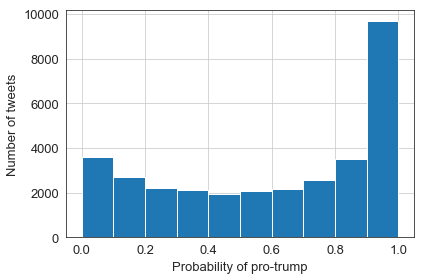

In [31]:
# 分析pro-trump

d = pd.Series(pros)
d.hist(bins=10)
plt.xlabel('Probability of pro-trump', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("fig/probality of pro-trump.pdf", dpi=300)

In [32]:
trump_count = 0
hillary_count = 0

for row in d:
    if row >= 0.8:
        trump_count += 1
    elif row < 0.2:
        hillary_count += 1
        
trump_count, hillary_count

(13198, 6314)

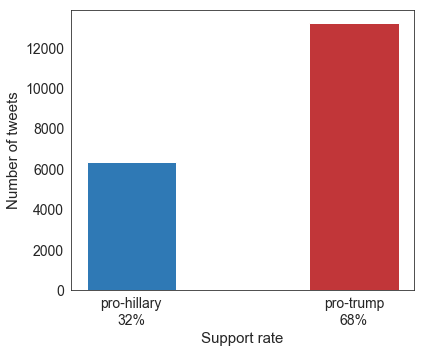

In [33]:
plt.figure(figsize=(6, 5))
plt.bar(1, hillary_count, color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, trump_count, color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(hillary_count / (trump_count + hillary_count)),
         "pro-trump\n{0:.0%}".format(trump_count / (trump_count + hillary_count))]
plt.xticks([1, 1.5], label)
plt.xlabel('Support rate', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("support rate.png", dpi=300)

### 分析构造的IRA全网络

In [2]:
all_net = nx.read_gpickle("data/network/ira-all.gpickle")

In [3]:
all_net.number_of_nodes()

136155

In [4]:
all_net.number_of_edges()

277346

In [14]:
# very important!

ira_user_set = set()
for uid in putin.IRA_user_set:
    try:
        if len(putin._map[uid]) != 64:
            ira_user_set.add(str(putin._map[uid]))
    except:
        if len(uid) != 64:
            ira_user_set.add(uid)

In [15]:
ira_user_list = list(ira_user_set)

In [17]:
all_net[ira_user_list[0]]

AtlasView({'2951904191': {}, '1339835893': {}, '2949261587': {}, '16715398': {}, '15980895': {}, '1330457336': {}, '3573336134': {}, '14522241': {}, '1640929196': {}, '716813053': {}, '22799750': {}, '759251': {}, '25073877': {}, '16589206': {}, '3313779296': {}, '41634520': {}, '1734949104': {}, '29417304': {}, '17629860': {}, '358545917': {}, '3245135844': {}, '18643437': {}, '66533920': {}, '16228398': {}, '229592356': {}, '823738296': {}, '2227403496': {}, '20772763': {}, '14717197': {}, '259001548': {}, '31228313': {}, '22203756': {}, '3124986791': {}, '439608838': {}, '17194090': {}, '4925188717': {}, '1140341359': {}, '4917092018': {}, '712967096': {}, '53130511': {}, '21688902': {}, '783214': {}, '2897970594': {}, '2864051403': {}, '18949452': {}, '15745368': {}, '45876240': {}})

In [5]:
CI_rst = np.load("data/CI_rst/CI_out_ira-all.rst.npy")
CI_rank_rst = CI_rst[0][:100]

In [7]:
gtG = gt.load_graph("data/network/ira-all.gt")

In [8]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()

In [11]:
for i, v_i in enumerate(CI_rst[0][:100]):
    if gtG.vp["id"][v_i] in putin.IRA_user_set:
        print(i + 1, gtG.vp["id"][v_i], "√", gtG.vp["CI_out"][v_i])
    else:
        print(i + 1, gtG.vp["id"][v_i])

1 4224729994 √ 9774220320
2 4272870988 √ 3391611142
3 4218156466 √ 2633802975
4 4355797094 √ 910731040
5 4332740714 √ 671897160
6 3990577513 √ 606935962
7 2882331822 √ 401314368
8 4508630900 √ 290958800
9 4289431230 √ 126468975
10 4224912857 √ 109297230
11 4311371968 √ 85030572
12 3312143142 √ 66640057
13 4437444442 √ 51572868
14 2570631118 √ 39201323
15 4208754922 √ 32189402
16 3969530725 √ 24926789
17 4209684039 √ 20294178
18 4299815909 √ 12773523
19 737420000043139072 √ 9583344
20 2944766250 √ 8328685
21 4840551713 √ 6930924
22 3091936475 √ 6598340
23 2530830345 √ 6170235
24 3074013672 √ 5585250
25 703303258476036096 √ 4320140
26 703670485859614720 √ 3604500
27 4859142199 √ 3053353
28 1679279490 √ 2987160
29 2753338899 √ 2884680
30 1681425248 √ 1863215
31 3284112337
32 96442308
33 3074563039 √ 1363332
34 4437233895 √ 1294898
35 1687183549 √ 1266430
36 101264587
37 2533653547 √ 1136611
38 4510755552
39 1671234620 √ 922375
40 475056290
41 4484289856 √ 895600
42 2547141851 √ 844872
43 

In [10]:
gtG.list_properties()

CI_both        (vertex)  (type: int64_t)
CI_out         (vertex)  (type: int64_t)
id             (vertex)  (type: string)
katz           (vertex)  (type: double)
katz_rev       (vertex)  (type: double)
